Mini Portofolio ML Evaluation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.1
pandas version :  1.2.4
seaborn version :  0.11.1


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

<h2>Load Data</h2>

In [3]:
df = pd.read_excel('youtube_statistics.xlsx')
df.info()

nums = ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
cats = ['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'publish_date']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [4]:
df.sample(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
25052,2018-04-05,Kuladheivam SUN TV Episode - 889 (04-04-18),THIRU TV,24,14:30:00,"kuladheivam|""kuladheivam 04.04.2018.""|""kuladhe...",207061,868,209,38,False,False,False,Kuladheivam SUN TV Episode - 889 (04-04-18)\n\...,20,595,43,2018-04-04
36647,2018-06-14,Bodhai Kodhai - Teaser | Gautham Vasudev Menon...,Ondraga Entertainment,10,05:59:28,"Ondraga Entertainment|""Gautham Vasudev Menon""|...",121582,4651,126,108,False,False,False,Official Teaser of Ondraga Originals upcoming ...,18,866,93,2018-06-13
20660,2018-03-11,வங்கதேசத்துக்கு எதிரான டி20 போட்டியில் தமிழில்...,Oneindia Tamil | ஒன்இந்தியா தமிழ்,25,11:39:55,"t20|""match""|""india""|""srilanka""|""bangladesh""|""c...",514724,12587,228,521,False,False,False,வங்கதேசத்துக்கு எதிரான டி-20 போட்டியில் தினேஷ்...,14,1134,76,2018-03-10
24112,2018-03-31,BEWAFA TU - GURI (Full Song) Satti Dhillon | ...,Geet MP3,10,12:30:03,"latest punjabi songs 2017|""latest punjabi vide...",8165283,274741,13408,28054,False,False,False,Subscribe To Our New Channel For New Songs : ...,29,1623,85,2018-03-26
22767,2018-03-23,வாணி ராணி - VAANI RANI - Episode 1523 - 22/03...,RadaanMedia,24,16:30:01,"Vaani rani|""rani""|""Radhika in funny character""...",401020,1960,397,176,False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,14,3172,51,2018-03-22


In [5]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


<h2>Describe Nums and Cats</h2>

In [6]:
df[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [7]:
df[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,36791,36791,36791,36791,36791,36791,36791,36791,36746,36791
unique,205,16431,1390,12375,12463,2,2,2,13979,219
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17 00:00:00
freq,199,19,284,333,1120,35611,36034,36780,166,318
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13 00:00:00


<h2>Value Count Cats</h2>

In [8]:
for col in cats:
    print('Value dari kolom ' + col + ':')
    print(df[col].value_counts())
    print()

Value dari kolom trending_date:
2017-12-23    199
2018-04-15    198
2017-12-22    198
2018-05-05    198
2018-01-25    197
             ... 
2018-03-26    151
2018-02-03    151
2017-12-20    149
2018-03-04    148
2018-03-15    110
Name: trending_date, Length: 205, dtype: int64

Value dari kolom title:
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                        19
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani                                           16
Nandhini | Today @ 9 pm | Sun TV                                                                    15
Kasthooriman || General Promo || Mon to Sat at 8:30 PM || Asianet                                   14
Golak Bugni Bank Te Batua Full Movie (HD) | Harish Verma | Simi Chahal | Superhit Punjabi Movies    14
                                                                                                    ..
Priya Varrier, Roshan and Omar Lulu ഒരു അഡാറ് ലവ്വിലെ താരങ്ങള്‍  മീറ്റ് ദി എഡിറ്

<h2>Check Duplicated Data</h2>

In [9]:
df.duplicated().any()

True

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().any()

False

<h2>Check Missing Values</h2>

In [12]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               44
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [13]:
df['description'].fillna(df['description'].mode()[0], inplace = True)

In [14]:
df.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

<h2>Handling Outliers</h2>

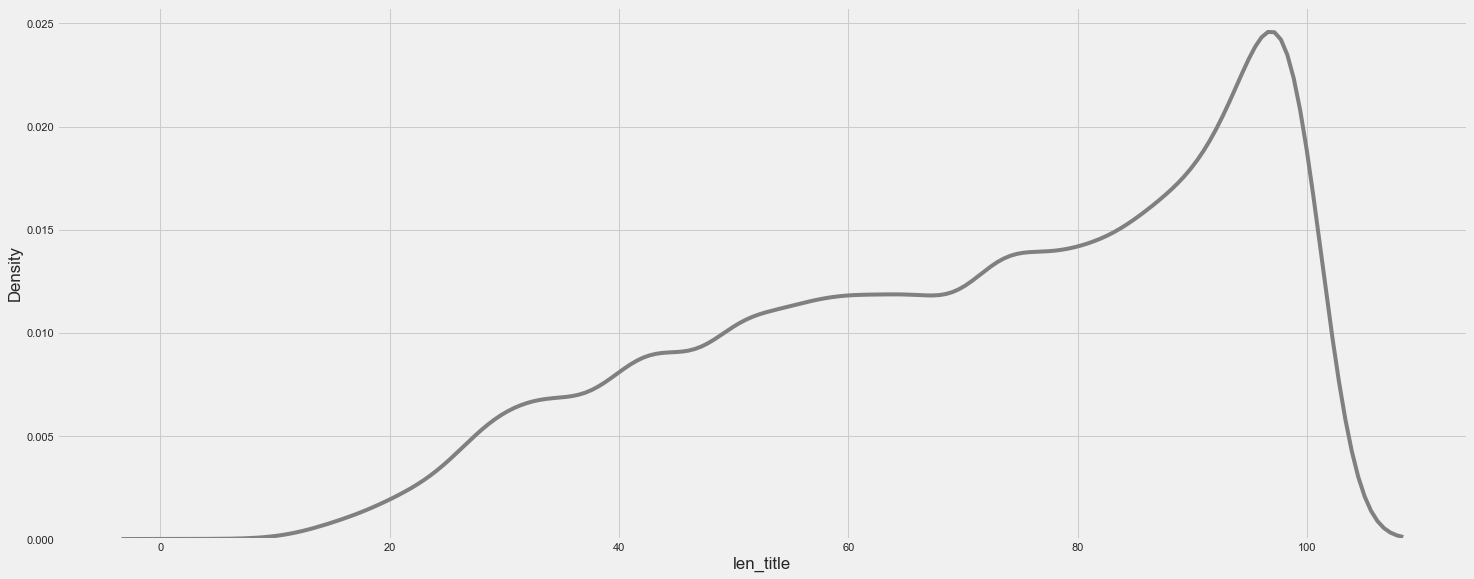

In [15]:
sns.kdeplot(x = 'len_title', color = 'gray', data = df)
plt.tight_layout()
#iqr = likes, dislikes, comment_count, No_tags, desc_len, len_title
#z-score = 

<h2>IQR</h2>

In [16]:
#Using IQR
print('Jumlah baris sebelum memfilter outlier:', len(df))

filtered_entries = np.array([True] * len(df))
for col in ['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print('Jumlah baris setelah memfilter outlier:', len(df))

Jumlah baris sebelum memfilter outlier: 32562
Jumlah baris setelah memfilter outlier: 24952


<h2>Standardization</h2>

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
df['likes_std'] = StandardScaler().fit_transform(df['likes'].values.reshape(len(df), 1))
df['dislikes_std'] = StandardScaler().fit_transform(df['dislikes'].values.reshape(len(df), 1))
df['comment_count_std'] = StandardScaler().fit_transform(df['comment_count'].values.reshape(len(df), 1))
df['No_tags_std'] = StandardScaler().fit_transform(df['No_tags'].values.reshape(len(df), 1))
df['desc_len_std'] = StandardScaler().fit_transform(df['desc_len'].values.reshape(len(df), 1))
df['len_title_std'] = StandardScaler().fit_transform(df['len_title'].values.reshape(len(df), 1))

In [19]:
df.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std
count,24952.000000,2.495200e+04,24952.000000,24952.000000,24952.000000,24952.000000,24952.000000,24952.000000,2.495200e+04,2.495200e+04,2.495200e+04,2.495200e+04,2.495200e+04,2.495200e+04
mean,22.213610,3.444792e+05,3985.085284,352.496914,385.623076,17.867305,748.319694,73.057390,-9.202855e-16,1.911216e-16,-1.004362e-15,6.418621e-16,7.842619e-16,-6.907103e-16
std,5.976868,4.348781e+05,5481.923416,410.639113,505.051676,9.033472,557.254876,20.928311,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,1.000000,4.024000e+03,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,-7.269648e-01,-8.584277e-01,-7.635472e-01,-1.867238e+00,-1.337511e+00,-3.251995e+00
25%,23.000000,9.411350e+04,580.750000,76.000000,48.000000,11.000000,330.750000,58.000000,-6.210235e-01,-6.733466e-01,-6.685055e-01,-7.602219e-01,-7.493484e-01,-7.194891e-01
50%,24.000000,1.972750e+05,1692.000000,193.000000,181.000000,18.000000,595.000000,77.000000,-4.183078e-01,-3.884192e-01,-4.051609e-01,1.468953e-02,-2.751394e-01,1.883902e-01
75%,24.000000,4.224022e+05,4935.000000,468.000000,518.000000,24.000000,1057.000000,92.000000,1.732848e-01,2.812820e-01,2.621110e-01,6.788993e-01,5.539413e-01,9.051370e-01
max,43.000000,9.585655e+06,29522.000000,2209.000000,2856.000000,44.000000,2514.000000,100.000000,4.658479e+00,4.521100e+00,4.891433e+00,2.892932e+00,3.168596e+00,1.287402e+00


<h2>Feature Enconding</h2>

In [45]:
import datetime as dt
df['trending_date_month'] = pd.to_datetime(df['trending_date'].dt.month)
df['trending_date_month'] = df['trending_date'].map(dt.datetime.toordinal)
df['trending_date_day'] = pd.to_datetime(df['trending_date'].dt.day)
df['trending_date_day'] = df['trending_date'].map(dt.datetime.toordinal)
df['publish_date_month'] = pd.to_datetime(df['publish_date'].dt.month)
df['publish_date_month'] = df['publish_date'].map(dt.datetime.toordinal)
df['publish_date_day'] = pd.to_datetime(df['publish_date'].dt.day)
df['publish_date_day'] = df['publish_date'].map(dt.datetime.toordinal)
df['publish_time'] = pd.to_datetime(df['publish_time'].dt.hour)
df['publish_time'] = df['publish_time'].map(dt.datetime.toordinal)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24952 entries, 1 to 36769
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           24952 non-null  datetime64[ns]
 1   title                   24952 non-null  object        
 2   channel_title           24952 non-null  object        
 3   category_id             24952 non-null  int64         
 4   publish_time            24952 non-null  int64         
 5   tags                    24952 non-null  object        
 6   views                   24952 non-null  int64         
 7   likes                   24952 non-null  int64         
 8   dislikes                24952 non-null  int64         
 9   comment_count           24952 non-null  int64         
 10  comments_disabled       24952 non-null  bool          
 11  ratings_disabled        24952 non-null  bool          
 12  video_error_or_removed  24952 non-null  bool  

<h2>EDA</h2>

<h2>Univariate Analysis</h2>

<h3>Box Plot</h3>

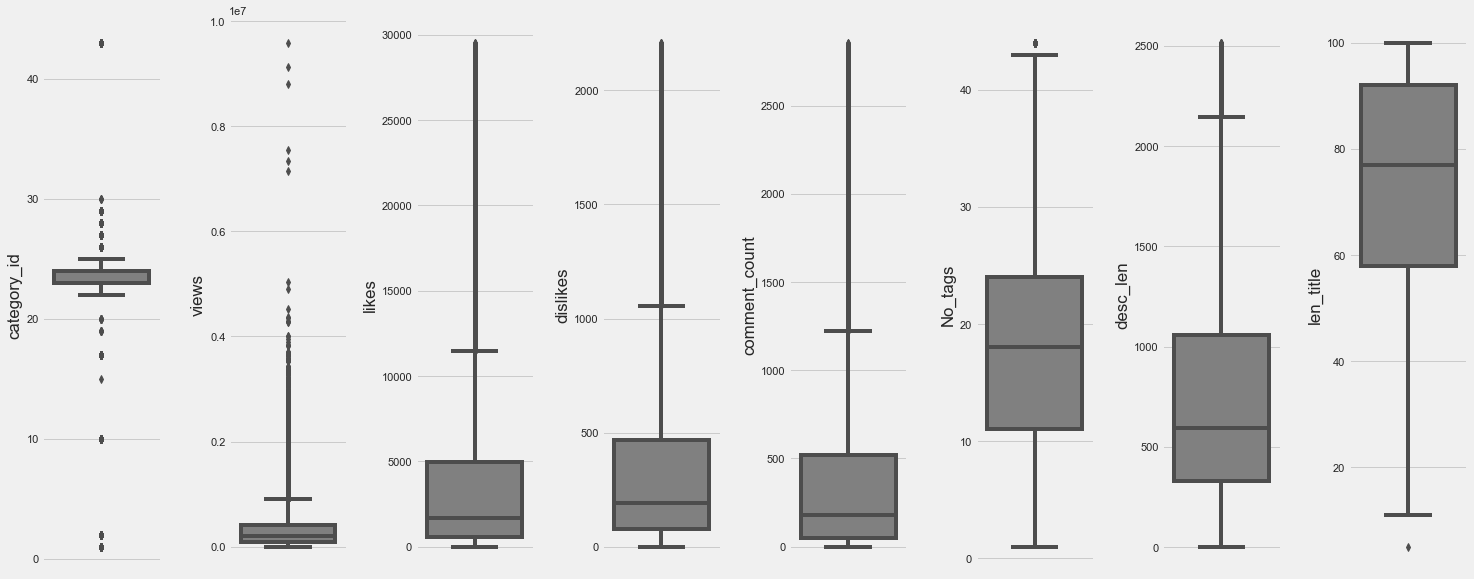

In [21]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df[nums[i]], color = 'gray', orient = 'v')
    plt.tight_layout()

<h3>Dist Plot</h3>

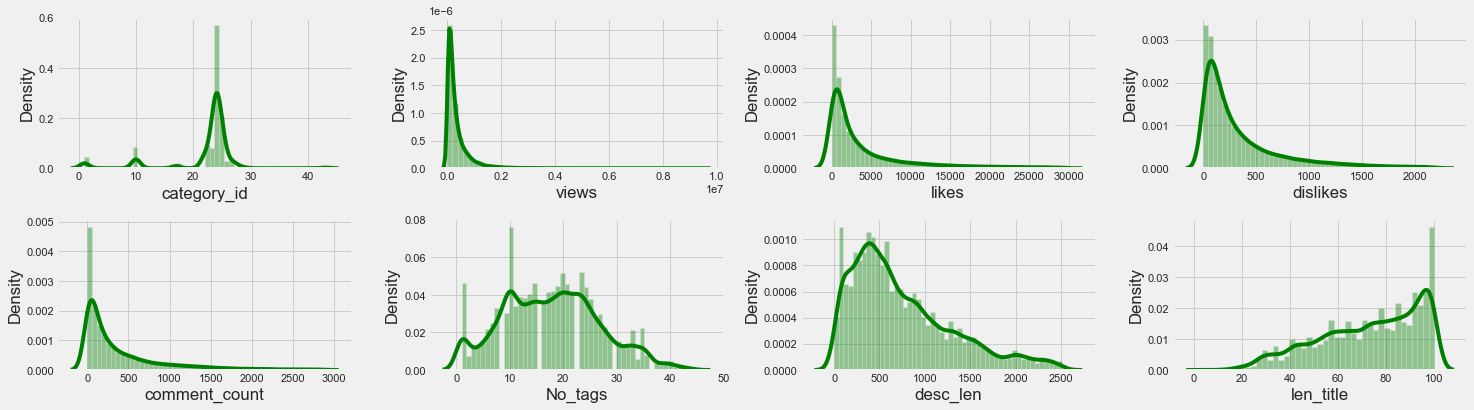

In [22]:
for i in range(0, len(nums)):
    plt.subplot(3, 4, i + 1)
    sns.distplot(df[nums[i]], color = 'green')
    plt.tight_layout()

<h2>Heatmap Correlation (belum di hapus yang rendundan)</h2>

<AxesSubplot:>

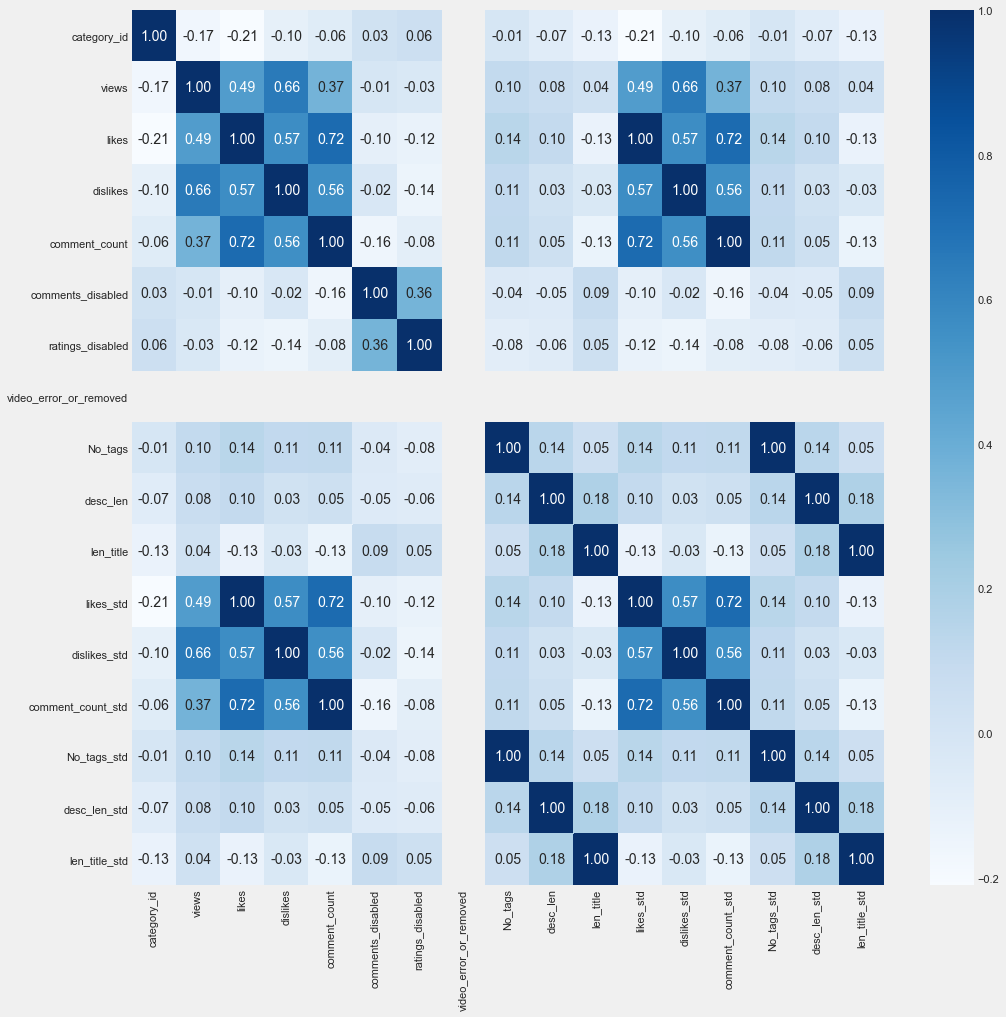

In [23]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

<h2>Heatmap Correlation</h2>

In [46]:
#hapus yang redundant
df_new = df.drop(columns=['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title', 'video_error_or_removed','trending_date','publish_date'])

<AxesSubplot:>

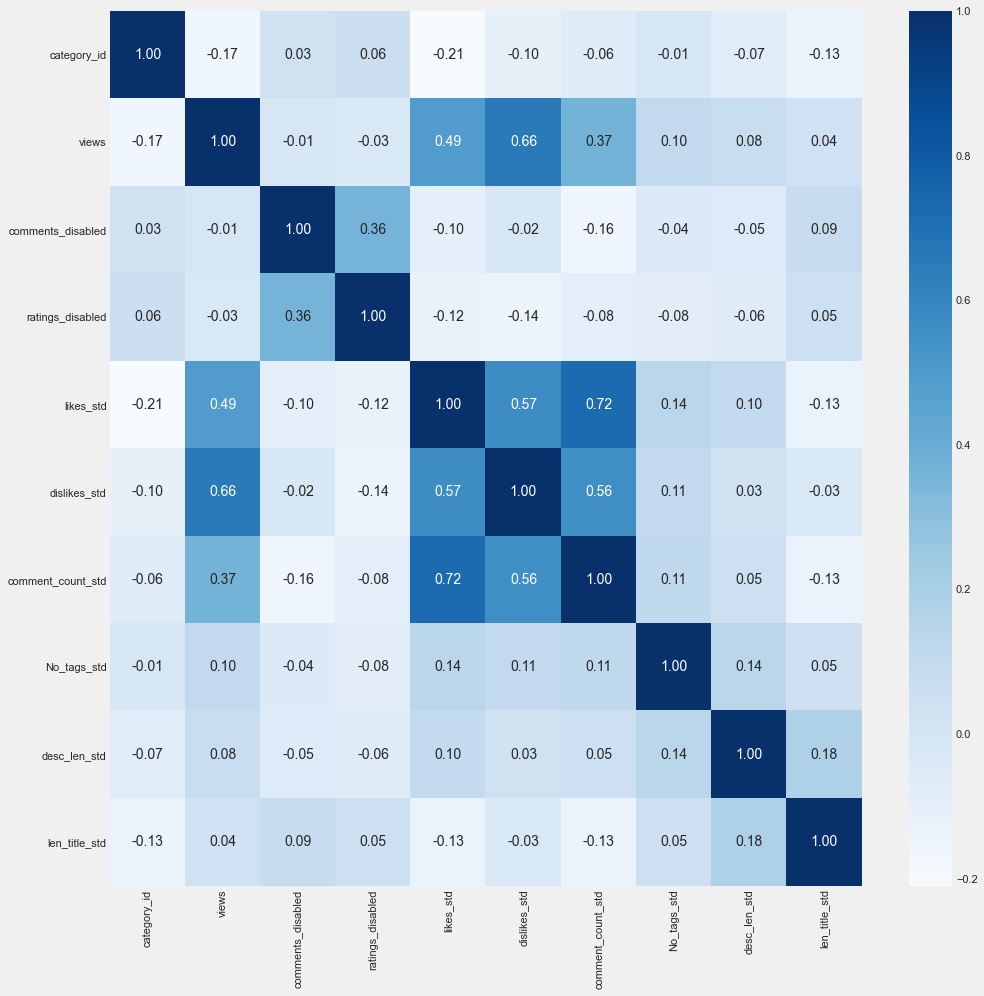

In [25]:
plt.figure(figsize = (15,15))
sns.heatmap(df_new.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

## Split Train & Test

In [47]:
x = df_new.drop(columns=['views','description','title','channel_title','tags']) # menggunakan semua feature kecuali target
y = df_new['views']

In [48]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=42) #Splitting the data into Train and Test

## Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [52]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [-3.62706289e+03 -6.29370334e-10 -5.58489262e+04  2.40597159e+05
  1.15603107e+05  2.54627484e+05 -6.50047275e+04  5.22403231e+03
  1.24876592e+04  2.51120260e+04  7.89997912e+03  7.89997912e+03
 -7.75634715e+03 -7.75634715e+03]
Intercept: 
 -211247714.16150758
MAE: 166785.97
RMSE: 296056.00
R2 score: 0.50


In [53]:
print("train Accuracy : ",regressor.score(xtrain,ytrain))
print("test Accuracy : ",regressor.score(xtest,ytest))

train Accuracy :  0.4795220409627904
test Accuracy :  0.49558496217820414


## Ridge

In [54]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

pred = ridge_model.predict(xtest)
eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 166781.44
RMSE: 296055.98
R2 score: 0.50


#### Hyperparameter Tuning Ridge

In [55]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [56]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 166781.44
RMSE: 296055.98
R2 score: 0.50


In [57]:
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])

Best solver: cholesky
Best alpha: 1


## Lasso

In [58]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 167443.99
RMSE: 295586.42
R2 score: 0.50


#### Hyperparameter Tuning Lasso

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 167444.60
RMSE: 295586.49
R2 score: 0.50


## ElasticNet

In [60]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 182246.32
RMSE: 309214.25
R2 score: 0.45


#### Hyperparameter Tuning ElasticNet

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [62]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 167444.32
RMSE: 295586.46
R2 score: 0.50


## DecisionTreeRegressor

In [63]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 155556.06
RMSE: 350065.98
R2 score: 0.29


## RandomForestRegressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 119047.69
RMSE: 238485.56
R2 score: 0.67


## SVR

In [65]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 243545.15
RMSE: 441573.53
R2 score: -0.12
